<h2>Gradient Descent </h2>

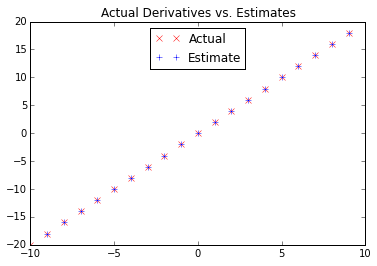

In [20]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
from functools import partial

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x):
    return x * x
def derivative(x):
    return 2*x

derivative_estimate = partial(difference_quotient, square, h=0.00001)

x = range(-10,10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, map(derivative, x), 'rx', label='Actual')
plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [30]:
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h = 0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

def f(x):
    return sum(x_i**2 for x_i in x)

def xpartial(x):
    return [2*x_i for x_i in x]

a = [1, 2]

print estimate_gradient(f, a)
print xpartial(a)

[2.00001000001393, 4.000010000027032]
[2, 4]


<p>Of course, in practice, estimation using difference quotients is computationally expensive. One good tool for calculating derivatives is sympy.<p>

<h4> Example: Minimizing Sum of Squares </h4>

In [33]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

#random starting point
import random
from linear_algebra import distance
v = [random.randint(-10,10) for _ in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) #compute gradient at v
    next_v = step(v, gradient, -0.01) #take negative gradient step
    if distance(next_v, v) < tolerance: #stop if distance converges
        break
    v = next_v #otherwise continue taking steps
v

[-2.0080715545420907e-06, 2.0080715545420907e-06, 4.0161431090841815e-06]

<p>Approximately [ 0, 0, 0]</p>
<p>Next, let's choose a step size that roughly minimizes the value of the objective function and does not pass inputs to our function that are outside the function domain</p>

In [36]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs) #same f as before
        except:
            return float('inf') #except it returns infinity when f produces an error
    return safe_f

<h4>All together now</h4>

In [ ]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes] #compute new thetas for each step size
        
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
    #stop if converging
    if abs(value - next_value) < tolerance:
        return theta
    else:
        theta, value = next_theta, next_value